# KORELASI

<img src='https://raw.githubusercontent.com/mdsatria/dataviz_course/master/notebook/img/correlation.jpg'>

Hingga saat ini kita telah mempelajari memvisualisasikan perbandingan antar kategori dalam variabel, menggambarkan perubahan suatu nilai sesuai dengan waktu (trend over time). Pada pertemuan ini kita akan membahas bagaimana menggambarkan hubungan (korelasi) antar dua variabel (katakanlah variabel $X$ dan variabel $Y$). Khusus untuk penggambaran korelasi, variabel harus bertipe ratio, interval atau ordinal.

Korelasi adalah nilai yang menggambarkan kuat-lemahnya hubungan/pengaruh dua buah variabel. Korelasi berdasarkan nilainya dapat dikategorikan menjadi dua, yaitu korelasi positif dan korelasi negatif. 

Korelasi positif menandakan semakin besar nilai $X$, maka nilai $Y$ akan semakin besar juga dan sebaliknya.<br>
Korelasi negatif menandakan semakin besar nilai $X$, maka nilai $Y$ akan semakin kecil dan sebaliknya.

In [1]:
import numpy as np
import pandas as pd

In [2]:
A = np.array([[2.5 , 2.4],[0.5 , 0.7],[2.2 , 2.9],[1.9, 2.2],[3.1, 3],[2.3, 2.7],[2, 1.6],[1, 1.1],[1.5, 1.6],[1.1, 0.9]])

pd.DataFrame(A, columns=['X', 'Y'])

,X,Y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


array $A$ pada contoh diatas memiliki dimensi $10\times2$, $n=10$ dan $variabel=2$. Variabel pertama kita notasikan dengan $X$ dan variabel kedua kita notasikan dengan $Y$. Kita dapat mengecek korelasi antar $X$ dan $Y$ dengan dua cara. Cara pertama dengan melihat plot scatter dan yang kedua menghitung korelasinya dengan persamaan.

In [3]:
X = A[:, 0]
Y = A[:, 1]

## Plot Scatter

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.style.use('seaborn')

Text(0, 0.5, 'Y')

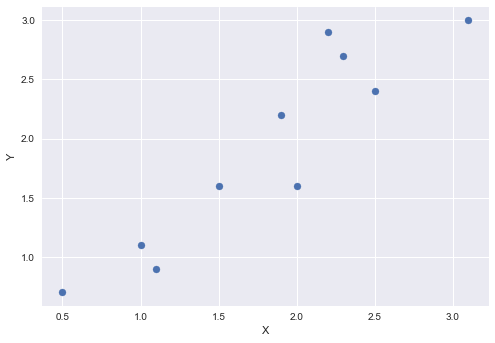

In [6]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

Pada grafik di atas, kita bisa melihat adanya pola dalam data. Semakin besar nilai $X$, maka nilai $Y$ akan semakin besar. Untuk mengetahui nilai korelasi secara pasti, kita dapat menghitungnya dengan persamaan Pearson atau Spearman.

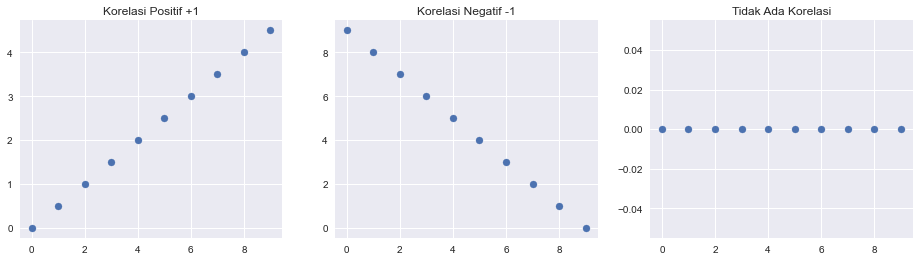

In [7]:
s = np.arange(0,10,1)
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].scatter(s, s*.5)
ax[0].set_title('Korelasi Positif +1')
ax[1].scatter(s, s[::-1])
ax[1].set_title('Korelasi Negatif -1')
ax[2].scatter(s, s-s)
ax[2].set_title('Tidak Ada Korelasi')
plt.show()

## Perhitungan Korelasi

Seperti yang telah dijelaskan di atas, tipe variabel yang dapat dihitung korelasinya adalah ordinal, interval dan ratio. Terdapat dua buah persamaan yang umum digunakan untuk menghitung korelasi, yaitu **Pearson Correlation** dan **Spearman Correlation**.

**Korelasi Pearson** menggambarkan hubungan antara dua buah variabel dengan tipe interval atau ratio. Korelasi Pearson menggambarkan hubungan linear berdasarkan nilai mentah data. Contoh korelaso Pearson adalah hubungan antar suhu udara dan kelembapan.

**Korelasi Spearman** menggambarkan hubungan antara dua variabel dengan tipe ordinal, interval atau ratio. Korelasi Spearman lebih umum digunakan untuk menggambarkan hubungan data ordinal. Oleh karena itu, korelasi Spearman berdasarkan nilai yang telah diurutkan alih-alih nilai mentah dari data. Contoh korelasi Spearman adalah hubungan antara nilai pelajaran Bahasa Inggris dengan nilai pelajaran Matematika.

Nilai korelasi ($r_{XY}$) antara variabel $X$ dan $Y$  memiliki rentang nilai dari -1 sampai +1.

$$-1\leq r\leq 1$$

Makna nilai koefisien korelasi dijelaskan pada tabel di bawah ini.

|Makna Korelasi|Koefisien Positif|Koefisien Negatif|
|:---|---:|---|
|Sangat Kuat|0.80 hingga 1.00| -0.80 hingga -1.00|
|Kuat|0.60 hingga 0.79|-0.60 hingga -0.79|
|Sedang|0.40 hingga 0.59|-0.40 hingga -0.59|
|Lemah|0.20 hingga 0.39|-0.20 hingga -0.39|
|Sangat Lemah|0.01 hingga 0.19|-0.01 hingga -0.19|

Nilai korelasi = 0 menandakan tidak ada hubungan sama sekali antara variabel $X$ dan $Y$.


Pada perkuliahan ini, kita akan menggunakan korelasi Pearson.

## Rumus Korelasi Pearson

$$r_{XY}={\frac {\sum _{i=1}^{n}(X_{i}-{\bar {X}})(Y_{i}-{\bar {Y}})}{{\sqrt {\sum _{i=1}^{n}(X_{i}-{\bar {X}})^{2}}}{\sqrt {\sum _{i=1}^{n}(Y_{i}-{\bar {Y}})^{2}}}}}$$


dimana :

$r_{XY}$ adalah korelasi antara variabel $X$ dan $Y$ <br>
$\bar{X}$ dan $\bar{Y}$ secara berturut-turut adalah nilai rerata dari $X$ dan $Y$ <br>

Perhitungan manual

In [8]:
t1 = ((X-X.mean()) * (Y-Y.mean())).sum()
t1

5.539

In [9]:
t2 = np.sqrt(((X-X.mean())**2).sum())
t2

2.355631550136821

In [10]:
t3 = np.sqrt(((Y-Y.mean())**2).sum())
t3

2.5394881374009213

In [11]:
t1/(t2*t3)

0.9259292726922453

Perhitungan dengan Numpy

In [12]:
np.corrcoef(X, Y)

array([[1.        , 0.92592927],
       [0.92592927, 1.        ]])

Apa makna dari nilai korelasi di atas ?

$$\begin{bmatrix}
r_{X,X} & r_{X,Y} \\ 
r_{Y,X}  & r_{Y,Y} 
\end{bmatrix}$$

## Contoh Kasus

### Read data

In [13]:
import seaborn as sns

e:\python\env\ml\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
df = pd.read_csv('../dataset/gapminder.csv')

In [15]:
df

,country,year,children,child_mortality,income,life,population,continent
0,Afghanistan,1800,7.00,469.0,603.0,28.2,3280000,Asia
1,Albania,1800,4.60,375.0,667.0,35.4,400000,Europe
2,Algeria,1800,6.99,460.0,715.0,28.8,2500000,Africa
3,Andorra,1800,NaN,NaN,1200.0,NaN,2650,Europe
4,Angola,1800,6.93,486.0,618.0,27.0,1570000,Africa
...,...,...,...,...,...,...,...,...
41060,Venezuela,2014,2.37,17.3,17100.0,75.0,30000000,South America
41061,Vietnam,2014,1.96,22.1,5310.0,74.1,91700000,Asia
41062,Yemen,2014,4.22,55.0,3830.0,69.0,25800000,Asia
41063,Zambia,2014,5.10,66.9,3690.0,61.1,15400000,Africa


* country = negara
* year = tahun
* children = jumlah rata-rata anak pada per-kapita
* child_mortality = tingkat kematian anak di bawah lima tahun per 1000 angka kelahiran
* income = penghasilan rata-rata per-kapita per-tahun (USD)
* life = rata-rata umur hidup
* population = jumlah penduduk
* continent = wilayah benua dari negara

### Ekplorasi data

Daftar negara :

In [16]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina', 'Burma (Myanmar)', 'Burundi',
       'CZ', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
     

Jumlah negara :

In [17]:
df['country'].nunique()

191

Rentang tahun :

In [18]:
df['year'].nunique()

215

Deskripsi atribut numerik :

In [19]:
df.describe()

,year,children,child_mortality,income,life,population
count,41065.000000,38915.000000,39565.000000,40850.000000,39050.000000,4.106500e+04
mean,1907.000000,5.429936,290.736623,4593.196059,42.651095,1.287636e+07
std,62.065238,1.604419,160.957266,10187.574848,16.036860,6.332032e+07
min,1800.000000,1.120000,2.260000,245.000000,1.010000,1.830000e+03
25%,1853.000000,4.640000,140.000000,855.000000,31.000000,2.830000e+05
50%,1907.000000,5.940000,357.000000,1510.000000,35.400000,1.690000e+06
75%,1961.000000,6.600000,419.000000,3530.000000,54.700000,5.770000e+06
max,2014.000000,8.870000,756.000000,179000.000000,84.200000,1.400000e+09


Ingat, fungsi *.describe()* hanya dapat dijalankan pada atribut numerik. Namun, tidak semua atribut numerik (angka) berarti interval atau ratio. <br>

Manakah atribut yang bertipe interval/ratio pada dataset di atas?


### Data cleaning

Cek jumlah missing value pada setiap kolom

In [20]:
df.isnull().sum()

country               0
year                  0
children           2150
child_mortality    1500
income              215
life               2015
population            0
continent             0
dtype: int64

Cek row dengan missing value

In [21]:
df[df.isnull().any(axis=1)]

,country,year,children,child_mortality,income,life,population,continent
3,Andorra,1800,NaN,NaN,1200.0,NaN,2650,Europe
47,Dominica,1800,NaN,NaN,663.0,NaN,20000,North America
98,Liechtenstein,1800,NaN,NaN,NaN,NaN,5800,Europe
108,Marshall Islands,1800,NaN,NaN,539.0,NaN,5830,Oceania
114,Monaco,1800,NaN,NaN,1950.0,NaN,7790,Europe
...,...,...,...,...,...,...,...,...
40994,Nauru,2014,NaN,36.0,12600.0,NaN,10300,Oceania
41004,Palau,2014,NaN,20.4,15500.0,NaN,17600,Oceania
41016,Saint Kitts and Nevis,2014,NaN,13.4,26800.0,NaN,50800,North America
41020,San Marino,2014,NaN,2.3,56100.0,NaN,32900,Europe


In [22]:
df[df.isnull().any(axis=1)]['country'].nunique()

10

In [23]:
df[df.isnull().any(axis=1)]['country'].value_counts()

Monaco                   215
Marshall Islands         215
Dominica                 215
Liechtenstein            215
San Marino               215
Andorra                  215
Tuvalu                   215
Palau                    215
Nauru                    215
Saint Kitts and Nevis    215
Name: country, dtype: int64

Dari data di atas, kita mengetahui bahwa Andorra, Dominica, Liechtenstein, Marshall Islands, Monaco, Nauru, Palau, Saint Kitts and Nevis, San Marino dan Tuvalu tidak memiliki data *children*, *life* dan  *child_mortality* yang lengkap hampir sepanjang rentang tahun dataset tersebut. Untuk itu, akan lebih baik kita menghapus data negara tersebut terlebih dahulu.

In [24]:
negara_hapus = df[df.isnull().any(axis=1)]['country'].unique()

In [25]:
negara_hapus

array(['Andorra', 'Dominica', 'Liechtenstein', 'Marshall Islands',
       'Monaco', 'Nauru', 'Palau', 'Saint Kitts and Nevis', 'San Marino',
       'Tuvalu'], dtype=object)

In [26]:
for i in negara_hapus:
    df.drop(df[df['country']==str(i)].index, inplace=True)

In [27]:
df

,country,year,children,child_mortality,income,life,population,continent
0,Afghanistan,1800,7.00,469.0,603.0,28.2,3280000,Asia
1,Albania,1800,4.60,375.0,667.0,35.4,400000,Europe
2,Algeria,1800,6.99,460.0,715.0,28.8,2500000,Africa
4,Angola,1800,6.93,486.0,618.0,27.0,1570000,Africa
5,Antigua and Barbuda,1800,5.00,474.0,757.0,33.5,37000,North America
...,...,...,...,...,...,...,...,...
41060,Venezuela,2014,2.37,17.3,17100.0,75.0,30000000,South America
41061,Vietnam,2014,1.96,22.1,5310.0,74.1,91700000,Asia
41062,Yemen,2014,4.22,55.0,3830.0,69.0,25800000,Asia
41063,Zambia,2014,5.10,66.9,3690.0,61.1,15400000,Africa


Pada penanganan missing value untuk dataset ini, kita akan berusaha mengisi nilai missing value dengan nilai sebelumnya. Misalnya saja nilai *life* di Indonesia pada tahun 1950 tidak ada (missing value). Namun, pada tahun sebelumnya (1949) Indonesia memiliki nilai *life*. Kita akan mengisi nilai missing value dengan nilai tahun sebelumnya pada negara yang sama.

Untuk itu, terlebih dahulu kita harus memastikan data kita tersortir dari *country* kemudian *year*.

In [28]:
df.sort_values(['country', 'year'], ascending=[1, 1], inplace=True)

Setelah data tersortir, kita mengisi missing value dengan nilai sebelumnya menggunakan method 'ffill' di Pandas *fillna()*

In [29]:
df

,country,year,children,child_mortality,income,life,population,continent
0,Afghanistan,1800,7.00,469.0,603.0,28.2,3280000,Asia
191,Afghanistan,1801,7.00,469.0,603.0,28.2,3280000,Asia
382,Afghanistan,1802,7.00,469.0,603.0,28.2,3280000,Asia
573,Afghanistan,1803,7.00,469.0,603.0,28.2,3280000,Asia
764,Afghanistan,1804,7.00,469.0,603.0,28.2,3280000,Asia
...,...,...,...,...,...,...,...,...
40300,Zimbabwe,2010,4.03,86.3,1930.0,49.7,12700000,Africa
40491,Zimbabwe,2011,4.02,79.0,2170.0,52.4,12900000,Africa
40682,Zimbabwe,2012,4.00,69.8,2490.0,54.9,13100000,Africa
40873,Zimbabwe,2013,3.96,62.3,2490.0,56.8,13400000,Africa


In [30]:
df.fillna(method='ffill', inplace=True)

In [31]:
df.isnull().sum()

country            0
year               0
children           0
child_mortality    0
income             0
life               0
population         0
continent          0
dtype: int64

Kemudian untuk memudahkan akses data, kita akan menset *year* sebagai index dari data tanpa menghapus kolom *year*.

In [32]:
df = df.set_index('year', drop=False)

In [33]:
df

,country,year,children,child_mortality,income,life,population,continent
year,,,,,,,,
1800,Afghanistan,1800,7.00,469.0,603.0,28.2,3280000,Asia
1801,Afghanistan,1801,7.00,469.0,603.0,28.2,3280000,Asia
1802,Afghanistan,1802,7.00,469.0,603.0,28.2,3280000,Asia
1803,Afghanistan,1803,7.00,469.0,603.0,28.2,3280000,Asia
1804,Afghanistan,1804,7.00,469.0,603.0,28.2,3280000,Asia
...,...,...,...,...,...,...,...,...
2010,Zimbabwe,2010,4.03,86.3,1930.0,49.7,12700000,Africa
2011,Zimbabwe,2011,4.02,79.0,2170.0,52.4,12900000,Africa
2012,Zimbabwe,2012,4.00,69.8,2490.0,54.9,13100000,Africa


Setelah menset index, hal yang tidak kalah penting kita lakukan adalah mensorting dataset berdasarkan index.

In [34]:
df.sort_index(inplace=True)

In [35]:
df

,country,year,children,child_mortality,income,life,population,continent
year,,,,,,,,
1800,Afghanistan,1800,7.00,469.00,603.0,28.2,3280000,Asia
1800,Zimbabwe,1800,6.75,396.00,869.0,33.7,1090000,Africa
1800,Albania,1800,4.60,375.00,667.0,35.4,400000,Europe
1800,Tunisia,1800,6.40,460.00,715.0,28.8,800000,Africa
1800,Bahrain,1800,7.03,440.00,1240.0,30.3,64500,Asia
...,...,...,...,...,...,...,...,...
2014,Tonga,2014,3.72,17.10,5270.0,71.4,101000,Oceania
2014,Kuwait,2014,2.01,8.86,72600.0,82.8,3690000,Asia
2014,Estonia,2014,1.61,3.40,27100.0,77.2,1320000,Europe


Memilih data tahun 2000

In [36]:
df.loc[2000]

,country,year,children,child_mortality,income,life,population,continent
year,,,,,,,,
2000,Morocco,2000,2.78,49.40,4490.0,69.3,28800000,Africa
2000,Cambodia,2000,3.81,107.00,1390.0,60.2,12200000,Asia
2000,Benin,2000,5.96,139.00,1670.0,57.5,6870000,Africa
2000,Romania,2000,1.31,21.90,10400.0,71.1,22100000,Europe
2000,US,2000,2.05,8.45,45700.0,76.9,282000000,North America
...,...,...,...,...,...,...,...,...
2000,Kenya,2000,5.18,106.00,2100.0,55.6,32000000,Africa
2000,Tunisia,2000,2.14,30.00,7570.0,74.3,9710000,Africa
2000,Sudan,2000,5.47,104.00,2320.0,63.4,27300000,Africa


Memilih data dengan rentang tahun

In [37]:
df.loc[1995:2000]

,country,year,children,child_mortality,income,life,population,continent
year,,,,,,,,
1995,Swaziland,1995,4.80,93.8,5810.0,59.4,927000,Africa
1995,Guatemala,1995,5.09,63.9,5600.0,65.8,10400000,North America
1995,Chile,1995,2.31,13.1,12100.0,75.1,14400000,South America
1995,Malaysia,1995,3.31,13.3,14600.0,71.9,20500000,Asia
1995,Haiti,1995,4.89,124.0,1700.0,55.0,7740000,North America
...,...,...,...,...,...,...,...,...
2000,Kenya,2000,5.18,106.0,2100.0,55.6,32000000,Africa
2000,Tunisia,2000,2.14,30.0,7570.0,74.3,9710000,Africa
2000,Sudan,2000,5.47,104.0,2320.0,63.4,27300000,Africa


Memilih tahun yang berbeda

In [38]:
df.loc[[1995,1990,2000]]

,country,year,children,child_mortality,income,life,population,continent
year,,,,,,,,
1995,Swaziland,1995,4.80,93.8,5810.0,59.4,927000,Africa
1995,Guatemala,1995,5.09,63.9,5600.0,65.8,10400000,North America
1995,Chile,1995,2.31,13.1,12100.0,75.1,14400000,South America
1995,Malaysia,1995,3.31,13.3,14600.0,71.9,20500000,Asia
1995,Haiti,1995,4.89,124.0,1700.0,55.0,7740000,North America
...,...,...,...,...,...,...,...,...
2000,Kenya,2000,5.18,106.0,2100.0,55.6,32000000,Africa
2000,Tunisia,2000,2.14,30.0,7570.0,74.3,9710000,Africa
2000,Sudan,2000,5.47,104.0,2320.0,63.4,27300000,Africa


### Menghitung korelasi dengan Pandas

In [39]:
df.corr()

,year,children,child_mortality,income,life,population
year,1.000000,-0.463209,-0.791941,0.400589,0.779238,0.125062
children,-0.463209,1.000000,0.701259,-0.460704,-0.725071,-0.144532
child_mortality,-0.791941,0.701259,1.000000,-0.501805,-0.939805,-0.112156
income,0.400589,-0.460704,-0.501805,1.000000,0.554668,0.033245
life,0.779238,-0.725071,-0.939805,0.554668,1.000000,0.119583
population,0.125062,-0.144532,-0.112156,0.033245,0.119583,1.000000


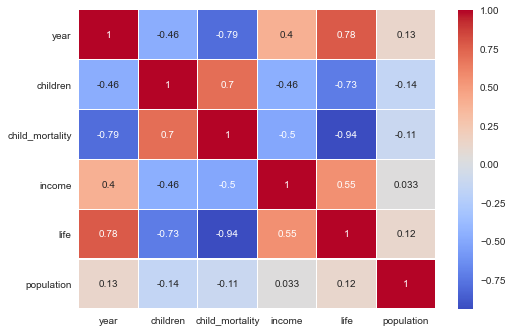

In [40]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

--------------------

### Visualisasi hubungan variabel

**Visualisasi hubungan rata-rata pendapatan per kapita dengan tingkat kematian anak pada tahun 2000.**

*Dengan matplotlib*

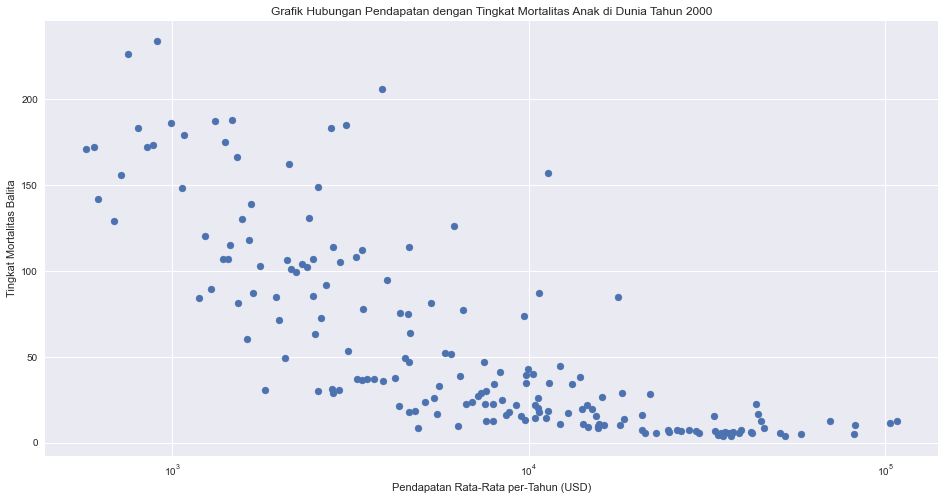

In [47]:
plt.figure(figsize=(16,8))
plt.scatter(df.loc[2000]['income'], df.loc[2000]['child_mortality'])
plt.title('Grafik Hubungan Pendapatan dengan Tingkat Mortalitas Anak di Dunia Tahun 2000')
plt.xlabel('Pendapatan Rata-Rata per-Tahun (USD)')
plt.ylabel('Tingkat Mortalitas Balita')
plt.xscale('log')
plt.show()

*Dengan seaborn*

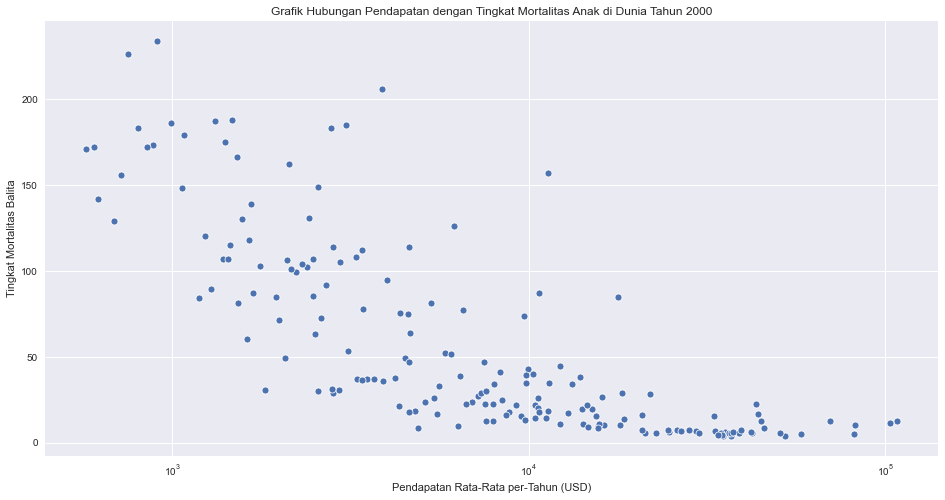

In [48]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df.loc[2000], x='income' ,y='child_mortality')
plt.title('Grafik Hubungan Pendapatan dengan Tingkat Mortalitas Anak di Dunia Tahun 2000')
plt.xlabel('Pendapatan Rata-Rata per-Tahun (USD)')
plt.ylabel('Tingkat Mortalitas Balita')
plt.xscale('log')
plt.show()

**Visualisasi hubungan tingkat kematian anak dengan rerata umur tahun 2000**

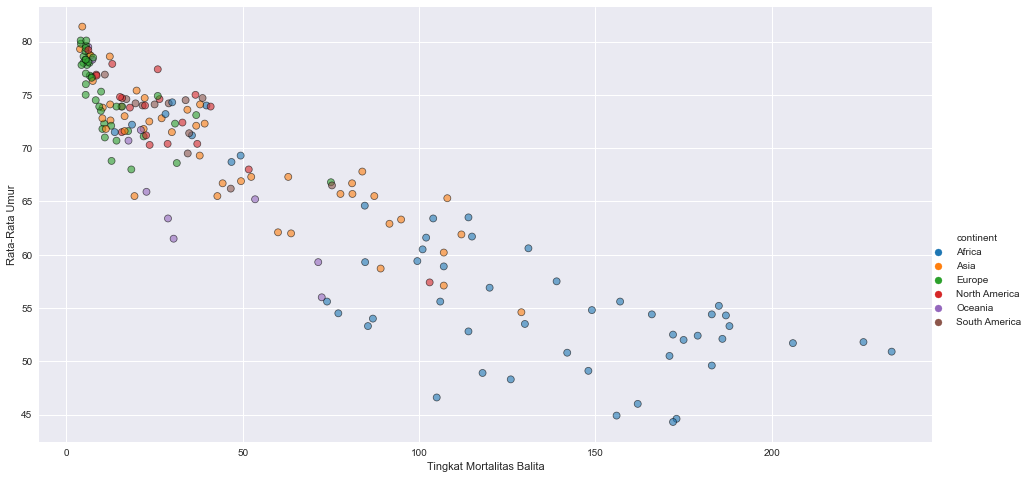

In [43]:
plt.figure(figsize=(16,8))

sns.scatterplot(data=df.loc[2000], x='child_mortality' ,y='life', hue='continent', palette='tab10', alpha=0.6, edgecolor='black')
plt.xlabel('Tingkat Mortalitas Balita')
plt.ylabel('Rata-Rata Umur')
plt.legend(bbox_to_anchor=(1.11, 0.5))
plt.show()

**Visualisasi hubungan rata-rata pendapatan per kapita dengan rata-rata umur berdasarkan wilayah beserta informasi jumlah penduduk.**

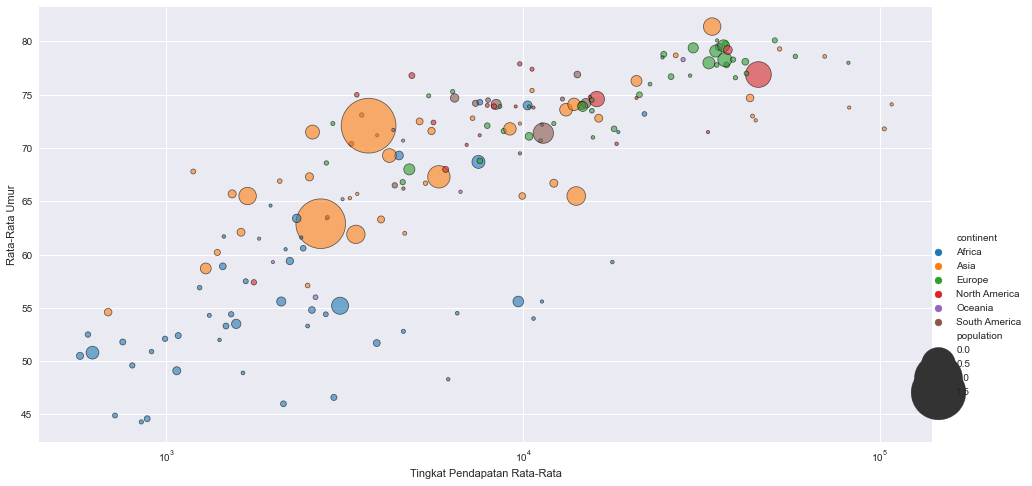

In [44]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df.loc[2000], x='income' ,y='life', hue='continent', size='population', sizes=(10, 3000),
                palette='tab10', alpha=0.6, edgecolor='black')
plt.xlabel('Tingkat Pendapatan Rata-Rata')
plt.ylabel('Rata-Rata Umur')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.11, 0.5))
plt.show()

**Visualisasi hubungan pendapatan per-tahun dengan rerata umur penduduk dunia tahun 1900-2000**

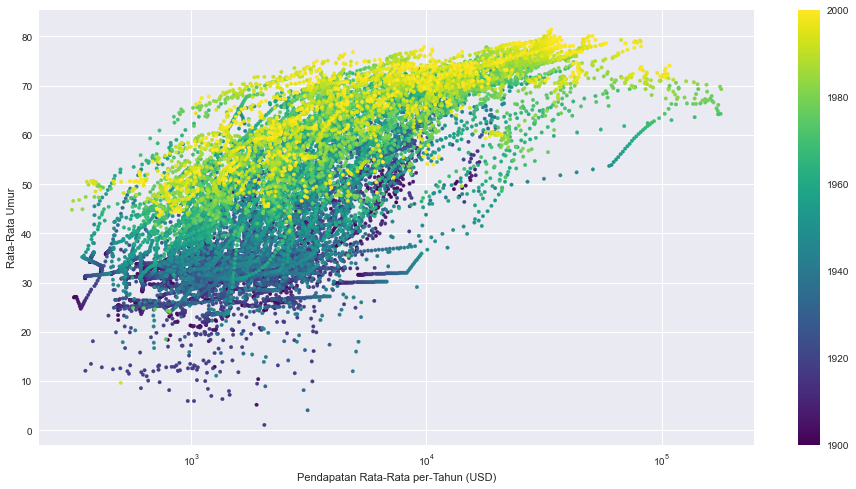

In [45]:
plt.figure(figsize=(16,8))
plt.scatter(df.loc[1900:2000]['income'], df.loc[1900:2000]['life'], marker='.', c=df.loc[1900:2000]['year'], cmap='viridis')
plt.xlabel('Pendapatan Rata-Rata per-Tahun (USD)')
plt.ylabel('Rata-Rata Umur')
plt.xscale('log')
plt.colorbar()
plt.show()

**Visualisasi hubungan pendapatan per-tahun dengan rerata umur pada tahun 2000 di setiap benua**

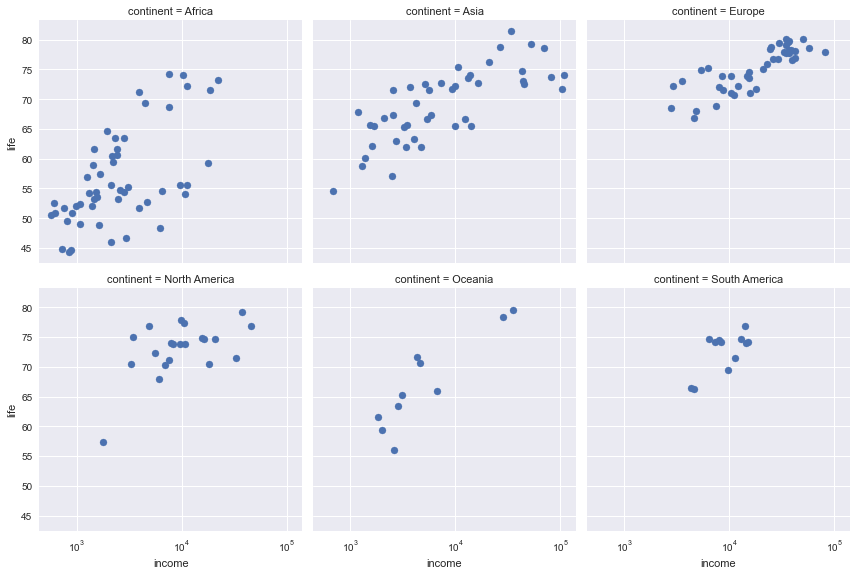

In [46]:
grafik = sns.FacetGrid(data=df.loc[2000], col='continent', col_wrap=3, height=4, sharex=True)
grafik.map(plt.scatter, 'income', 'life').set(xscale=('log'))
plt.show()